## Load Data

In [101]:
##imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
sys.path.append(os.path.join(os.getcwd(), '..'))
from datetime import datetime, timedelta

import importlib
%matplotlib widget
from tqdm import tqdm
import studies
importlib.reload(studies)
from studies import DCLP3,DCLP5,ReplaceBG,Flair,Loop,PEDAP,IOBP2, T1DEXI, T1DEXIP
from src import drawing, cdf, tdd, logger, pandas_helper
from studies.studydataset import StudyDataset
import logging
logger = logger.Logger.get_logger("",logging.WARNING)

In [4]:
def save_figure(fig, name):
    notebook_path = os.path.join(os.getcwd())
    path = os.path.join(notebook_path, name+'.png')
    fig.savefig(path, bbox_inches='tight', dpi=300)

In [5]:
patterns = {'iobp2': 'IOBP2 RCT Public Dataset',
            'flair': 'FLAIRPublicDataSet',
            'pedap': 'PEDAP Public Dataset - Release 3 - 2024-09-25',
            'dclp3': 'DCLP3 Public Dataset - Release 3 - 2022-08-04',
            'dclp5': 'DCLP5_Dataset_2022-01-20-5e0f3b16-c890-4ace-9e3b-531f3687cf53',
            'replacebg': 'REPLACE-BG Dataset-79f6bdc8-3c51-4736-a39f-c4c0f71d45e5',
            'loop': 'Loop study public dataset 2023-01-31',
            't1dexi': 'T1DEXI',
            't1dexip': 'T1DEXIP'}

data_path = os.path.join(os.getcwd(),'..','data','raw')
print(os.path.join(data_path, patterns['replacebg']))
flair = Flair(os.path.join(data_path, patterns['flair']))
dclp3 = DCLP3(os.path.join(data_path, patterns['dclp3']))
dclp5 = DCLP5(os.path.join(data_path, patterns['dclp5']))
loop = Loop(os.path.join(data_path, patterns['loop']))
pedap = PEDAP(os.path.join(data_path, patterns['pedap']))
iobp2 = IOBP2(os.path.join(data_path, patterns['iobp2']))
t1dexi = T1DEXI(os.path.join(data_path, patterns['t1dexi']))
t1dexip = T1DEXIP(os.path.join(data_path, patterns['t1dexip']))
replacebg = ReplaceBG(os.path.join(data_path, patterns['replacebg']))

/Users/jan/git/nudgebg/egvinsulin/notebooks/../data/raw/REPLACE-BG Dataset-79f6bdc8-3c51-4736-a39f-c4c0f71d45e5


In [6]:
studies_to_process = [flair, dclp3, dclp5, pedap,iobp2, t1dexi, t1dexip, replacebg]

def current_time():
  return datetime.now().strftime("%H:%M:%S")

with tqdm(total=len(studies_to_process)*4, desc=f"", bar_format='Step {n_fmt}/{total_fmt}: {desc} |{bar}', unit="step", leave=False) as progress:
  for study in studies_to_process:
      tqdm.write(f"[{current_time()}] Starting {study.study_name} ...")
      #check if file exists
      if not os.path.exists(study.study_path):
        tqdm.write(f"[{current_time()}] File {study.study_path} not found. Skipping...")
        progress.update(4)
        
      else:
        start = datetime.now()
        progress.set_description_str(f"{study.study_name}: Loading data...")
        study.load_data(subset=False)
        progress.update(1)

        progress.set_description_str(f"{study.study_name}: Extracting CGM...")
        study.extract_cgm_history(); 
        progress.update(1)
    
        progress.set_description_str(f"{study.study_name}: Extracting bolus...")
        study.extract_bolus_event_history(); 
        progress.update(1)

        progress.set_description_str(f"{study.study_name}: Extracting Basal...")
        study.extract_basal_event_history(); 
        progress.update(1)
      tqdm.write(f"[{current_time()}] Finished {study.study_name} took {(datetime.now()-start).total_seconds():.1f} seconds")
      

Step 0/32: Flair: Loading data... |          

[20:10:05] Starting Flair ...


Step 4/32: DCLP3: Loading data... |█▎            

[20:11:16] Finished Flair took 71.3 seconds
[20:11:16] Starting DCLP3 ...


Step 8/32: DCLP5: Loading data... |██▌           

[20:11:30] Finished DCLP3 took 14.4 seconds
[20:11:30] Starting DCLP5 ...


Step 12/32: PEDAP: Loading data... |███▊          

[20:12:05] Finished DCLP5 took 34.8 seconds
[20:12:05] Starting PEDAP ...


Step 16/32: IOBP2: Loading data... |█████         

[20:12:28] Finished PEDAP took 22.3 seconds
[20:12:28] Starting IOBP2 ...


Step 20/32: T1DEXI: Loading data... |██████▎      

[20:13:24] Finished IOBP2 took 56.4 seconds
[20:13:24] Starting T1DEXI ...


Step 24/32: T1DEXI: Loading data... |███████▌      

[20:14:04] Finished T1DEXI took 40.0 seconds
[20:14:04] Starting T1DEXI ...


Step 28/32: ReplaceBG: Loading data... |████████▊  

[20:14:12] Finished T1DEXI took 7.5 seconds
[20:14:12] Starting ReplaceBG ...


[20:14:48] Finished ReplaceBG took 36.2 seconds


## Loop

In [7]:
from dask.distributed import Client
Client()

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 12,Total memory: 36.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:65374,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 36.00 GiB
Comm: tcp://127.0.0.1:65387,Total threads: 3
Dashboard: http://127.0.0.1:65393/status,Memory: 9.00 GiB
Nanny: tcp://127.0.0.1:65377,


[20:15:03] Task exception was never retrieved
future: <Task finished name='Task-114' coro=<Client._gather.<locals>.wait() done, defined at /Users/jan/.pyenv/versions/babelbetes/lib/python3.11/site-packages/distributed/client.py:2394> exception=AllExit()>
Traceback (most recent call last):
  File "/Users/jan/.pyenv/versions/babelbetes/lib/python3.11/site-packages/distributed/client.py", line 2403, in wait
    raise AllExit()
distributed.client.AllExit


In [8]:
loop.extract_basal_event_history();
print('done')

[20:14:49] loop_cgm.parquet already exists. Skipping conversion.
[20:14:49] {parquet_path} does not exist yet. Converting CSV to parquet.
2025-03-03 20:15:03,468 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read-fused-toparquetdata-2658a750cf9aa825acab49f13858d8cb', 56))" coro=<Worker.execute() done, defined at /Users/jan/.pyenv/versions/babelbetes/lib/python3.11/site-packages/distributed/worker_state_machine.py:3607>> ended with CancelledError
2025-03-03 20:15:03,468 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('read-fused-toparquetdata-2658a750cf9aa825acab49f13858d8cb', 50))" coro=<Worker.execute() done, defined at /Users/jan/.pyenv/versions/babelbetes/lib/python3.11/site-packages/distributed/worker_state_machine.py:3607>> ended with CancelledError
2025-03-03 20:15:03,468 - distributed.worker.state_machine - WARNING - Async instruction for <Task cancelled name="execute(('rea

KeyboardInterrupt: 

Process Dask Worker process (from Nanny):
Traceback (most recent call last):
  File "/Users/jan/.pyenv/versions/3.11.0/lib/python3.11/asyncio/runners.py", line 118, in run
    return self._loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jan/.pyenv/versions/3.11.0/lib/python3.11/asyncio/base_events.py", line 650, in run_until_complete
    return future.result()
           ^^^^^^^^^^^^^^^
  File "/Users/jan/.pyenv/versions/babelbetes/lib/python3.11/site-packages/distributed/nanny.py", line 985, in run
    await worker.finished()
  File "/Users/jan/.pyenv/versions/babelbetes/lib/python3.11/site-packages/distributed/core.py", line 494, in finished
    await self._event_finished.wait()
  File "/Users/jan/.pyenv/versions/3.11.0/lib/python3.11/asyncio/locks.py", line 213, in wait
    await fut
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/jan/

## Visualize Distributions

In [9]:
study_name_dict = {study.study_name: study for study in studies_to_process}
colors = plt.cm.Set2(np.linspace(0, 1, len(study_name_dict)))

In [10]:
{study.study_name: study for study in studies_to_process}

{'Flair': <studies.flair.Flair at 0x1199a7950>,
 'DCLP3': <studies.dclp.DCLP3 at 0x11a34c650>,
 'DCLP5': <studies.dclp.DCLP5 at 0x11a5dc490>,
 'PEDAP': <studies.pedap.PEDAP at 0x31420fed0>,
 'IOBP2': <studies.iobp2.IOBP2 at 0x3316e4550>,
 'T1DEXI': <studies.t1dexi.T1DEXIP at 0x319c0f210>,
 'ReplaceBG': <studies.replacebg.ReplaceBG at 0x3148eb890>}

### Patients

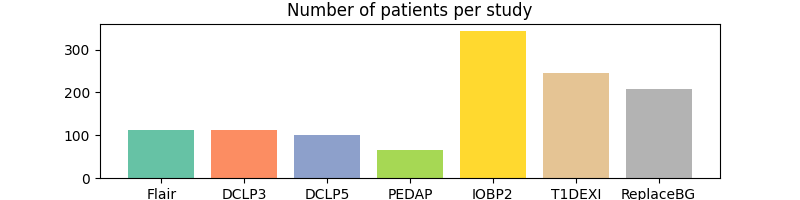

In [11]:
#visualize number of patient ids per study and data type as bar chart 
from src import cdf
f = plt.figure(figsize=(8,2)); ax = plt.gca()
num_patients = {study_name: len(study.cgm_history[StudyDataset.COL_NAME_PATIENT_ID].unique()) for study_name, study in study_name_dict.items()}
ax.bar(num_patients.keys(), num_patients.values(), color=colors)    
plt.title('Number of patients per study')
save_figure(f, 'num_patients_per_study')

### Data Points

In [12]:
# Data points per study

import ipywidgets as widgets
from IPython.display import display

# Create a radio button for selecting normalization
normalize_radio = widgets.RadioButtons(
    options=[('No', False), ('Yes', True)],
    description='Normalize:',
    disabled=False
)

def plot_data_points(normalize):
    # Calculate the number of data points for CGM, bolus, and basal for each study
    num_data_points = {
        'Bolus': {study_name: len(study.bolus_event_history) for study_name, study in study_name_dict.items()},
        'Basal': {study_name: len(study.basal_event_history) for study_name, study in study_name_dict.items()},
        'CGM': {study_name: len(study.cgm_history) for study_name, study in study_name_dict.items()}
    }

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 3))

    # Normalize the data points if required
    if normalize:
        total_data_points = {study_name: sum([num_data_points[datatype][study_name] for datatype in num_data_points]) for study_name in study_name_dict.keys()}
        num_data_points_normalized = {datatype: {study_name: (count / total_data_points[study_name]) * 100 for study_name, count in counts.items()} for datatype, counts in num_data_points.items()}
    else:
        num_data_points_normalized = num_data_points

    index = np.arange(len(study_name_dict))
    bar_width = 0.25
    # Plot the data points as bar charts
    bar1 = ax.bar(index, num_data_points_normalized['CGM'].values(), bar_width, label='CGM', color=drawing.colors['CGM'])
    bar2 = ax.bar(index + bar_width, num_data_points_normalized['Bolus'].values(), bar_width, label='Bolus', color=drawing.colors['Bolus'])
    bar3 = ax.bar(index + 2 * bar_width, num_data_points_normalized['Basal'].values(), bar_width, label='Basal', color=drawing.colors['Basal'])

    # Add labels, title, and legend
    ax.set_xlabel('Study')
    ax.set_ylabel('Percentage of Data Points' if normalize else 'Number of Data Points')
    ax.set_title(f"Data Point Numbers {'Normalized' if normalize else ''}")
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(study_name_dict.keys(), rotation=45)
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Display the radio button and plot
widgets.interact(plot_data_points, normalize=normalize_radio)
save_figure(f, 'data_points_per_study')

interactive(children=(RadioButtons(description='Normalize:', options=(('No', False), ('Yes', True)), value=Fal…

### Days

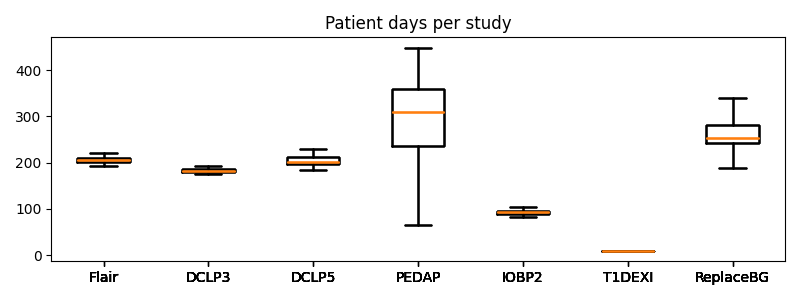

In [13]:
# Number of days (max - min datetime of cgm) per patient per study 
def days_from(datetimes):
    return (datetimes.max() - datetimes.min()).days

f = plt.figure(figsize=(8,3)); ax = plt.gca()
num_days_patient = {study_name: study.cgm_history.groupby(StudyDataset.COL_NAME_PATIENT_ID).apply(lambda x: days_from(x[StudyDataset.COL_NAME_DATETIME]),include_groups=False).values
                    for study_name, study in study_name_dict.items()}
for color, (study_name, study) in zip(colors, study_name_dict.items()):
    ax.boxplot(num_days_patient.values(), tick_labels=num_days_patient.keys(),showfliers=False,)
#ax.legend(study_name_dict.keys(),loc='upper right',bbox_to_anchor=(1.25, 1))
plt.title('Patient days per study')
plt.tight_layout()
save_figure(f, 'numdays')

PEDAP seems least controlled in terms of study duration
DCLP should be more close to 90

### Boluses

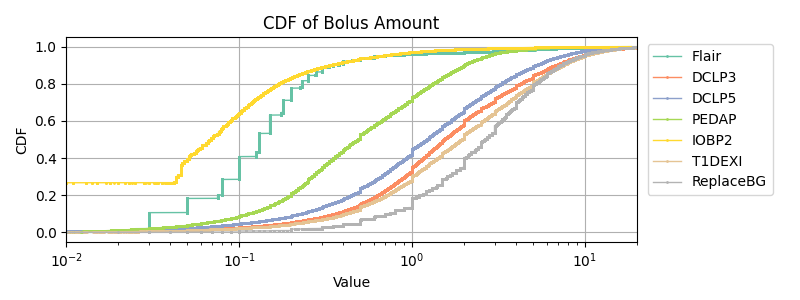

In [14]:
#CDF bolus
import logging
#del logger
f = plt.figure(figsize=(8,3)); ax = plt.gca()
#logger.level = logging.ERROR
for color, (study_name, study) in zip(colors, study_name_dict.items()):
    cdf.plot_cdf(study.bolus_event_history.bolus, ax=ax, color=color, linewidth=1)
ax.legend(study_name_dict.keys(),loc='upper right',bbox_to_anchor=(1.25, 1))
plt.title('CDF of Bolus Amount')
plt.xlim(0.01, 20)
plt.tight_layout()
ax.set_xscale('log');
save_figure(f, 'bolus_cdf');

In [15]:
(iobp2.bolus_event_history.bolus==0).sum()/len(iobp2.bolus_event_history)

0.26734282707636714

Findings:
 - IOBP2 has 25% 0 bolus values

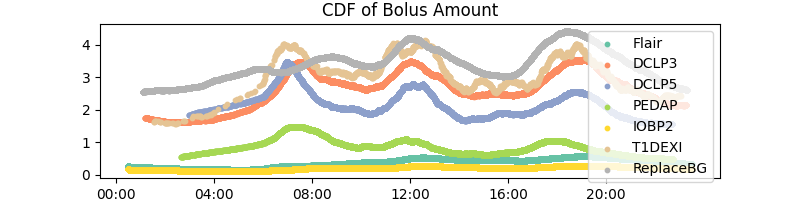

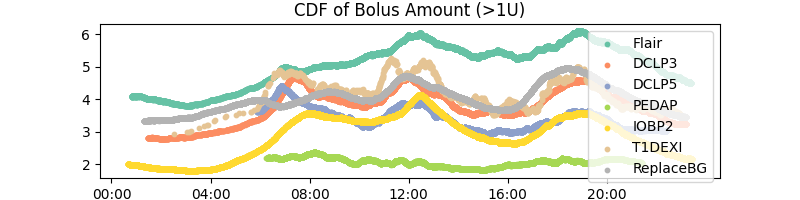

In [16]:
#CDF bolus

f = plt.figure(figsize=(8,2)); ax = plt.gca()
for color, (study_name, study) in zip(colors, study_name_dict.items()):
    drawing.drawMovingAverage(ax,study.bolus_event_history,StudyDataset.COL_NAME_DATETIME,
                              StudyDataset.COL_NAME_BOLUS,color=color)
ax.legend(study_name_dict.keys(),loc='upper right')
plt.title('CDF of Bolus Amount')
save_figure(f, 'bolus_cdf')

#excluded bolues < 1 U
f = plt.figure(figsize=(8,2)); ax = plt.gca()
for color, (study_name, study) in zip(colors, study_name_dict.items()):
    temp = study.bolus_event_history
    temp = temp.loc[temp.bolus > 1]
    drawing.drawMovingAverage(ax,temp,StudyDataset.COL_NAME_DATETIME,
                              StudyDataset.COL_NAME_BOLUS,color=color)
ax.legend(study_name_dict.keys(),loc='upper right')
plt.title('CDF of Bolus Amount (>1U)')

save_figure(f, 'bolus_cdf_gt_1');

 - When reducing to boluses >1 unit, the micro boluses are avoided but in the pedap study, the patterns are also less pronounced.
 - Many more zero boluses in Flair (probably a result of suspension). Question is why this is so much more commin than in other pumps?

## Basal

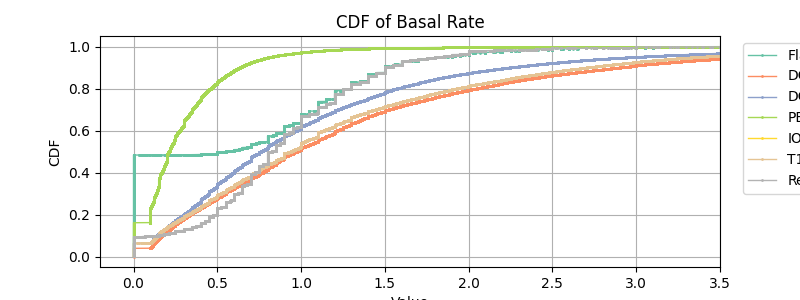

In [17]:
#CDF 
from src import cdf
f = plt.figure(figsize=(8,3)); ax = plt.gca()
for color, (study_name, study) in zip(colors, study_name_dict.items()):
    cdf.plot_cdf(study.basal_event_history.basal_rate, ax=ax, color=color, linewidth=1)
ax.legend(study_name_dict.keys(),loc='upper right',bbox_to_anchor=(1.25, 1))
plt.title('CDF of Basal Rate')
plt.xlim(-.2, 3.5)
save_figure(f, 'basal_cdf')

[20:16:20] IOBP2 has no basal data


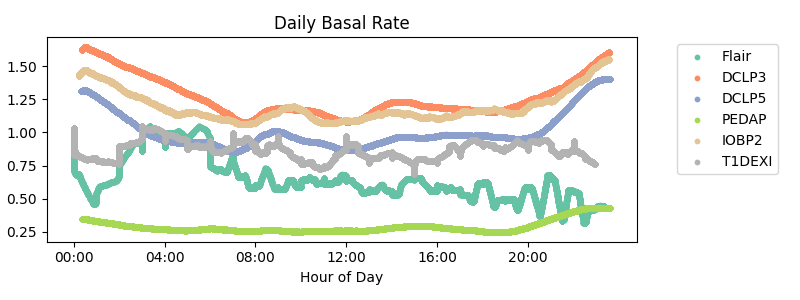

In [18]:
#daily basal rate

f = plt.figure(figsize=(8,3)); ax = plt.gca()
subset_studies = ['PEDAP']
for color, (study_name, study) in zip(colors, study_name_dict.items()):
    if study.basal_event_history.empty:
        logger.warning(f"{study_name} has no basal data")
        continue
    drawing.drawMovingAverage(ax,study.basal_event_history,StudyDataset.COL_NAME_DATETIME,
                              StudyDataset.COL_NAME_BASAL_RATE,color=color)
ax.legend(study_name_dict.keys(),loc='upper right',bbox_to_anchor=(1.25, 1))
plt.title('Daily Basal Rate')
plt.tight_layout()
save_figure(f, 'daily_basal')

We can clearly see which pumps modulate AID with basal and which don't. Those who do, show a clear daily pattern. Again, PEDAP is less pronounced in comparison. 

### CGM

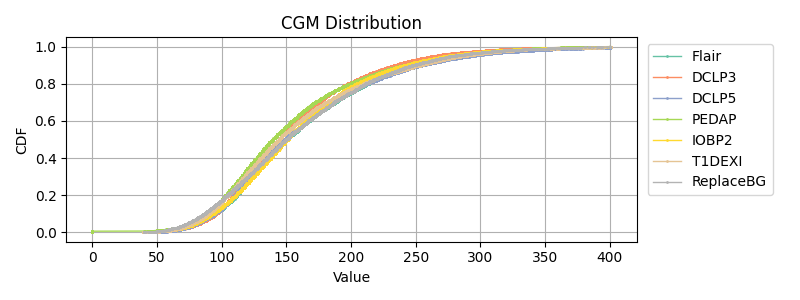

In [19]:
#cgm cdf 
from src import cdf
f = plt.figure(figsize=(8,3)); ax = plt.gca()
for color, (study_name, study) in zip(colors, study_name_dict.items()):
    cdf.plot_cdf(study.cgm_history.cgm.sample(10000), ax=ax, color=color, linewidth=1,markersize=1)
ax.legend(study_name_dict.keys(),loc='upper right',bbox_to_anchor=(1.25, 1))
plt.title('CGM Distribution')
plt.tight_layout()
save_figure(f, 'cgm_cdf');

Findings:
- PEDAP has zero valued CGMs
- Other studies have 39, and 401 values which we probably forgot to correct

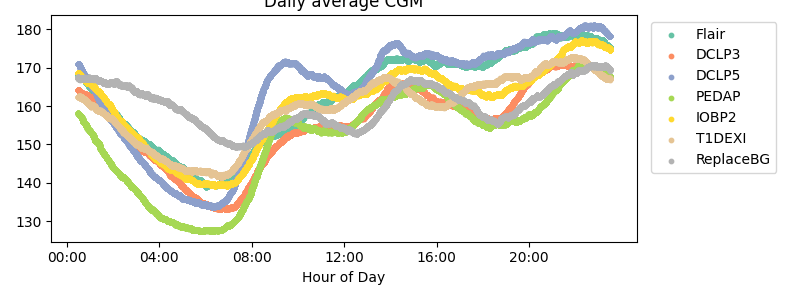

In [20]:
#daily CGM
from src import cdf
f = plt.figure(figsize=(8,3)); ax = plt.gca()
for color, (study_name, study) in zip(colors, study_name_dict.items()):
    drawing.drawMovingAverage(ax,study.cgm_history.sample(250000),StudyDataset.COL_NAME_DATETIME,
                              StudyDataset.COL_NAME_CGM,color=color)
ax.legend(study_name_dict.keys(),loc='upper right',bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.title('Daily average CGM')
save_figure(f, 'dailycgm')


## TDDs

In [83]:
#calculate Tdds for all studies
tdds_all_studies = {}

for study_name, study in tqdm(study_name_dict.items(), desc="Calculating TDDs for all studies"):
    tdd_bolus = study.bolus_event_history.groupby('patient_id').apply(lambda x: tdd.calculate_daily_bolus_dose(x), include_groups=False)
    tdd_basal = study.basal_event_history.groupby('patient_id').apply(lambda x: tdd.calculate_daily_basal_dose(x), include_groups=False)
    tdds = pd.concat([tdd_bolus, tdd_basal], axis=1)
    tdds_all_studies[study_name] = tdds

Calculating TDDs for all studies: 100%|██████████| 7/7 [02:38<00:00, 22.70s/it]


In [ ]:
#this is because iobp2 has no basal data and the tdd function is not correctly called
#therefore we end up merging wrong column names which we correct here, also we set basal to zero
tdds_all_studies['IOBP2'] = tdds_all_studies['IOBP2'].rename(columns={'basal_rate':'basal'}).drop(columns='datetime')
tdds_all_studies['IOBP2'].loc[:,'basal'] = 0
tdds_all_studies['IOBP2'].index.names = ['patient_id','date']

In [ ]:
#calcualte patient and study means
temp = [tdds.reset_index().assign(study=study) for study,tdds in tdds_all_studies.items()]
temp = pd.concat(temp)
patient_means = temp.dropna().groupby(['study','patient_id'])[['bolus','basal']].mean()#means by patient
display(patient_means.sample(5))

#study means
study_means = patient_means.groupby('study').mean()#mean per study
study_means['sum'] = study_means.bolus+study_means.basal
display(study_means)


,,bolus,basal
study,patient_id,,
T1DEXI,94,23.145342,18.270181
IOBP2,549,42.553570,0.000000
ReplaceBG,274,42.977614,29.234785
IOBP2,482,106.651548,0.000000
DCLP3,13,10.658497,11.224408


,bolus,basal,sum
study,,,
DCLP3,27.697895,26.646229,54.344124
DCLP5,23.893004,20.500868,44.393872
Flair,50.317275,10.841032,61.158307
IOBP2,54.707560,0.000000,54.707560
PEDAP,8.597037,5.368875,13.965912
ReplaceBG,22.510397,23.105693,45.616090
T1DEXI,29.389526,24.210363,53.599889


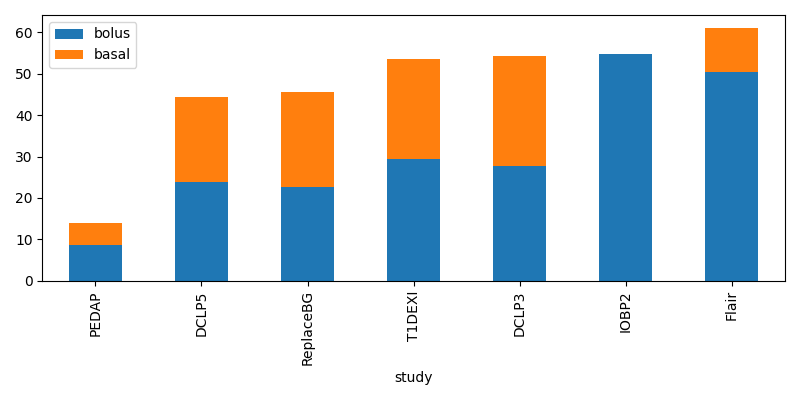

In [132]:
#display as stacked bar chart 
plt.figure(figsize=(8,4)); ax=plt.gca()
study_means = study_means.sort_values(by='sum')
study_means[['bolus','basal']].plot.bar(stacked=True,ax=ax)
plt.tight_layout()

In [ ]:
# Assign color values based on study column
study_colors = {study: color for study, color in zip(study_name_dict.keys(), colors)}
temp = patient_means.reset_index(level=0)

array([array([0.98823529, 0.55294118, 0.38431373, 1.        ]),
       array([0.98823529, 0.55294118, 0.38431373, 1.        ]),
       array([0.98823529, 0.55294118, 0.38431373, 1.        ]), ...,
       array([0.89803922, 0.76862745, 0.58039216, 1.        ]),
       array([0.89803922, 0.76862745, 0.58039216, 1.        ]),
       array([0.89803922, 0.76862745, 0.58039216, 1.        ])],
      dtype=object)

Text(0, 0.5, 'basal')

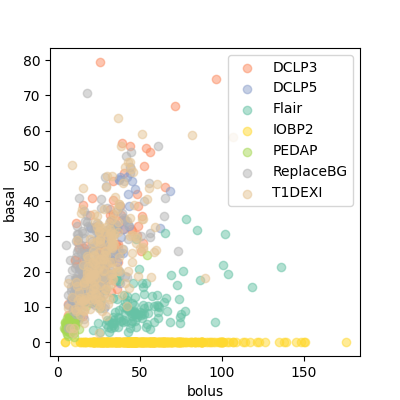

In [156]:
plt.figure(figsize=(4,4)); ax=plt.gca()
for study, df in temp.groupby('study'):
    ax.scatter(df.bolus, df.basal,c=study_colors[study],alpha=0.5,label=study)
plt.legend()
ax.set_xlabel('bolus');ax.set_ylabel('basal')

## Data overlaps


interactive(children=(Dropdown(description='study_name', options=('Flair', 'DCLP3', 'DCLP5', 'PEDAP', 'IOBP2',…

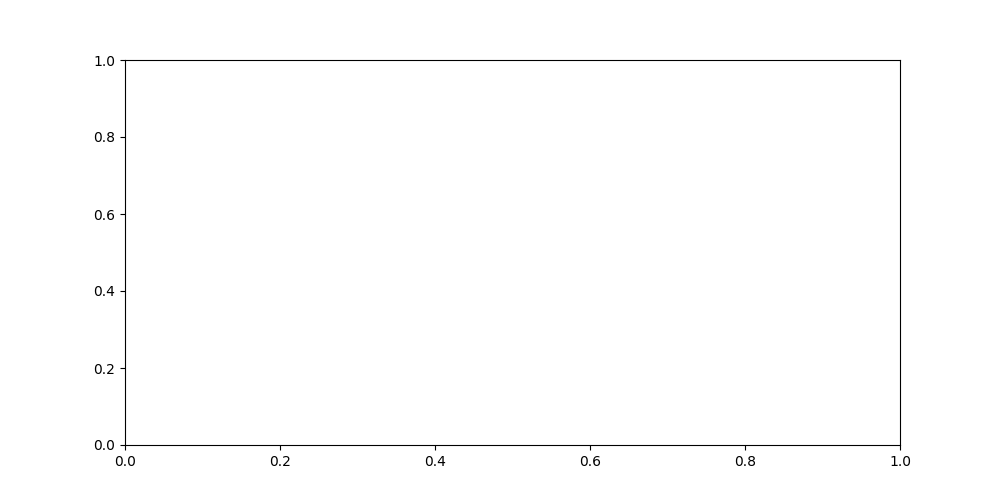

In [ ]:

%matplotlib widget
import ipywidgets as widgets
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
importlib.reload(drawing)

f = plt.figure(figsize=(10,5))
ax = f.gca()



@widgets.interact(study_name=study_name_dict.keys())
def draw_data_overlap(study_name):
    study = study_name_dict[study_name]
    
    # Get the first 10 unique patient IDs
    first_10_patient_ids = study.bolus_event_history['patient_id'].unique()[0:10]

    # Filter the data for these patient IDs
    bolus_filtered = study.bolus_event_history[study.bolus_event_history.patient_id.isin(first_10_patient_ids)]
    basal_filtered = study.basal_event_history[study.basal_event_history.patient_id.isin(first_10_patient_ids)]
    cgm_filtered = study.cgm_history[study.cgm_history.patient_id.isin(first_10_patient_ids)]

    # Plot the data
    ax.cla()
    #drawing.plot_patient_data(cgm_filtered, bolus_filtered, basal_filtered, resolution=timedelta(hours=24), ax = ax)
    drawing.draw
    plt.tight_layout()
    plt.show()
    ax.legend(loc='upper right')


In [ ]:
data = study_name_dict['Flair'].bolus_event_history

,patient_id,datetime,bolus,delivery_duration
176814,88,2018-06-04 13:33:20,7.7,0 days
176810,88,2018-06-04 14:03:02,2.2,0 days
176805,88,2018-06-04 19:08:38,6.6,0 days
176800,88,2018-06-04 20:42:51,0.3,0 days
176769,88,2018-06-04 23:01:28,5.1,0 days
...,...,...,...,...
5024920,4,2020-03-29 14:12:48,5.3,0 days
5024910,4,2020-03-29 18:37:00,10.4,0 days
5024895,4,2020-03-30 15:20:20,4.6,0 days
5024887,4,2020-03-30 19:46:16,8.6,0 days


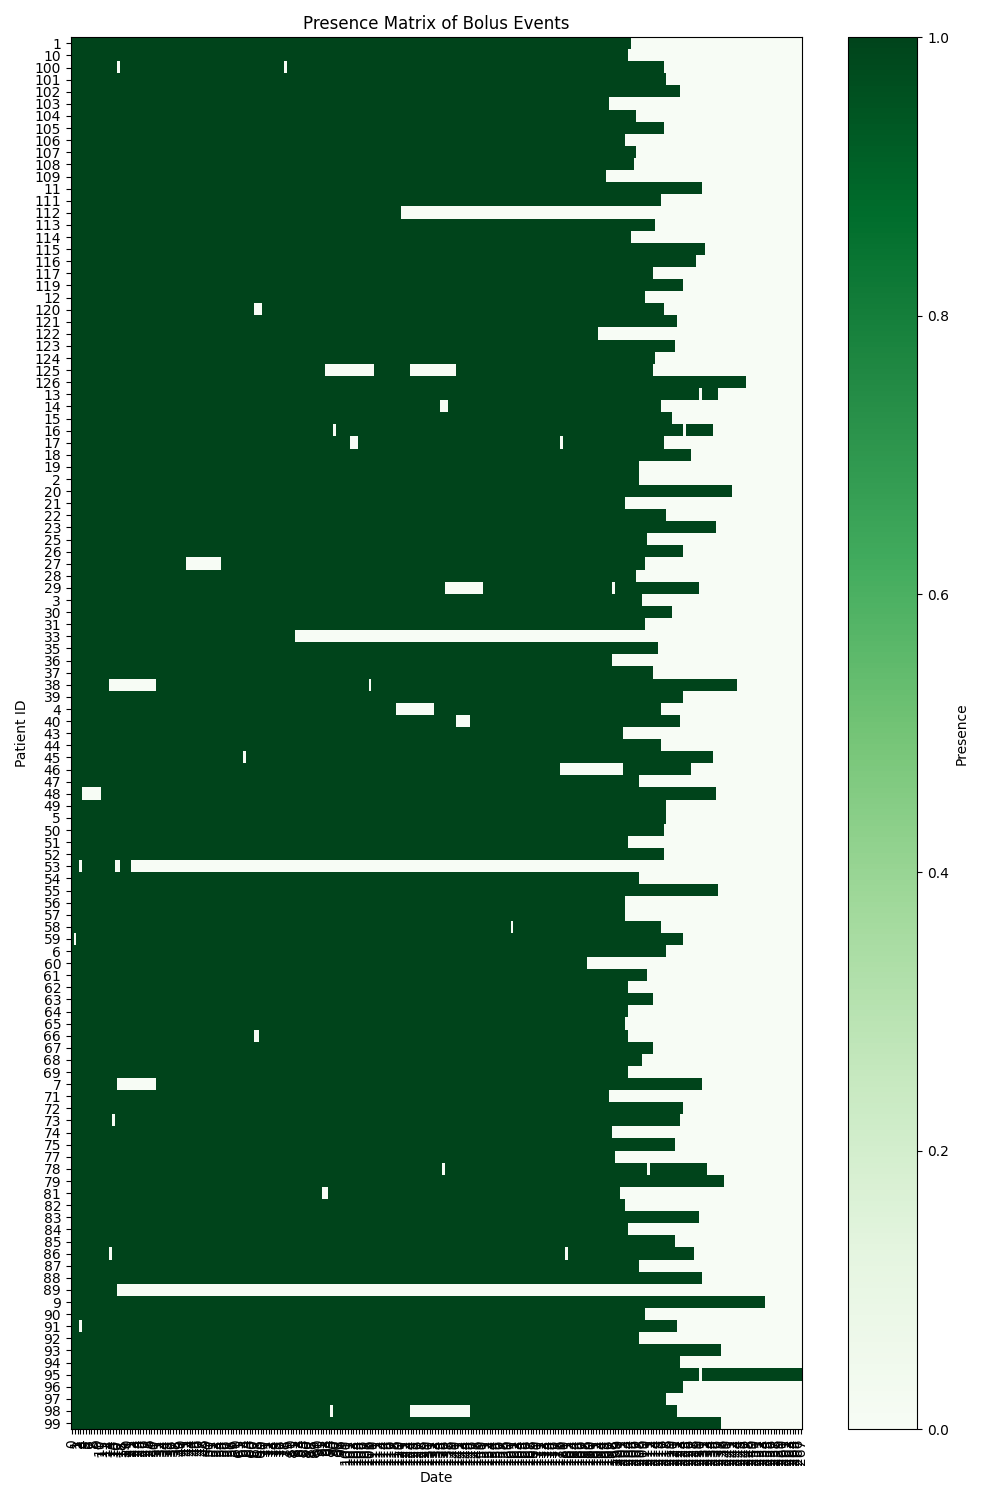

In [ ]:
data = study_name_dict['Flair'].bolus_event_history.copy()
data['day_sinde_start'] = data.datetime - data.groupby("patient_id")["datetime"].transform("min")
data['day_sinde_start'] = data['day_sinde_start'].dt.floor('D')

# Create presence matrix using a simple pivot table
presence_matrix = data.assign(present=1).pivot_table(
    index="patient_id", 
    columns="day_sinde_start", 
    values="present", 
    aggfunc="max",  # Use 'max' to collapse multiple entries to 1
    fill_value=0
)
presence_matrix

# Plot the presence matrix
plt.figure(figsize=(10, 15))
plt.imshow(presence_matrix, aspect='auto', cmap='Greens', interpolation='none')

# Configure the plot
plt.xticks(np.arange(len(presence_matrix.columns)), rotation=90)
plt.yticks(np.arange(len(presence_matrix.index)), presence_matrix.index)
plt.xlabel("Date")
plt.ylabel("Patient ID")
plt.title("Presence Matrix of Bolus Events")
plt.colorbar(label='Presence')
plt.tight_layout()
plt.show()

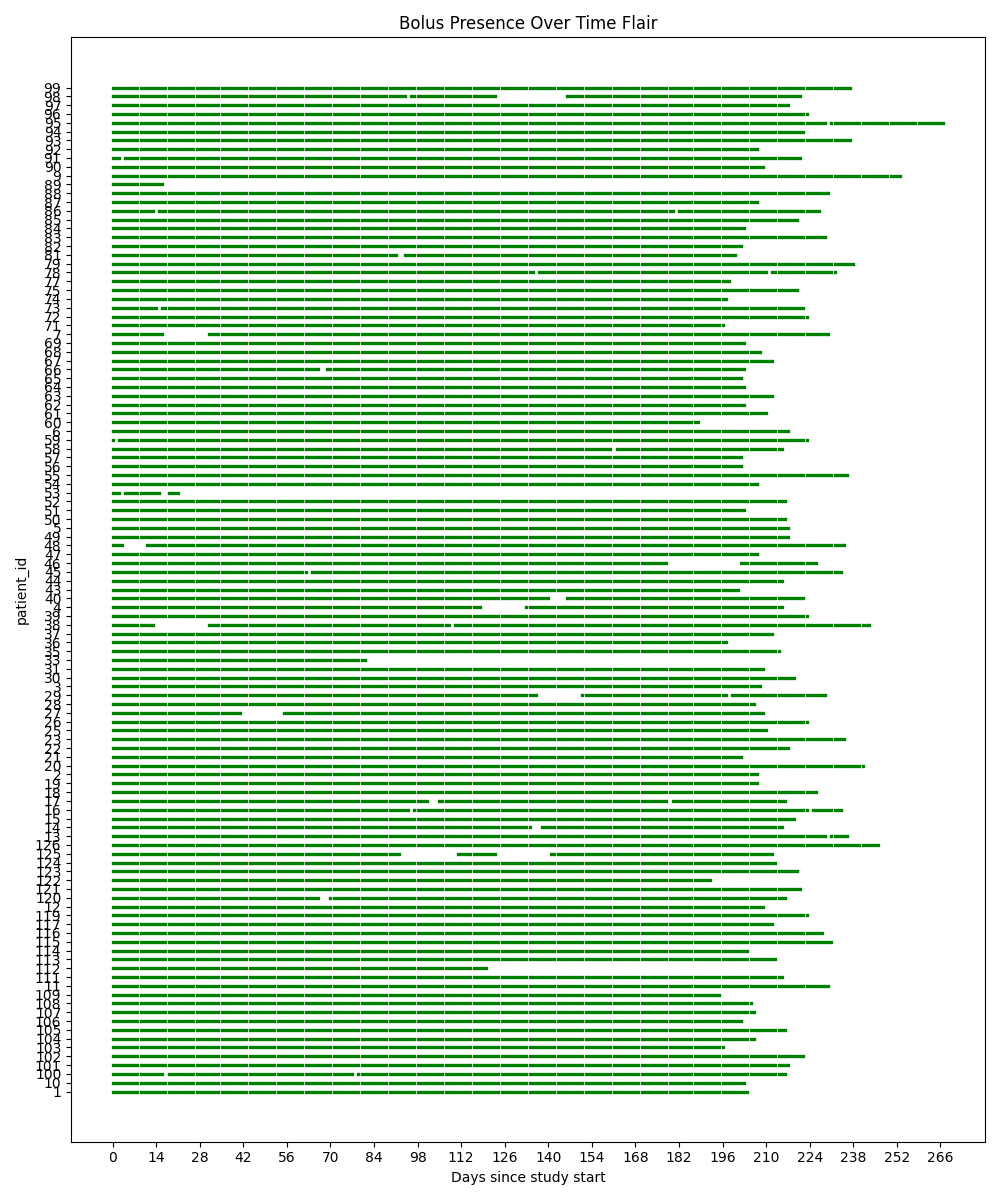

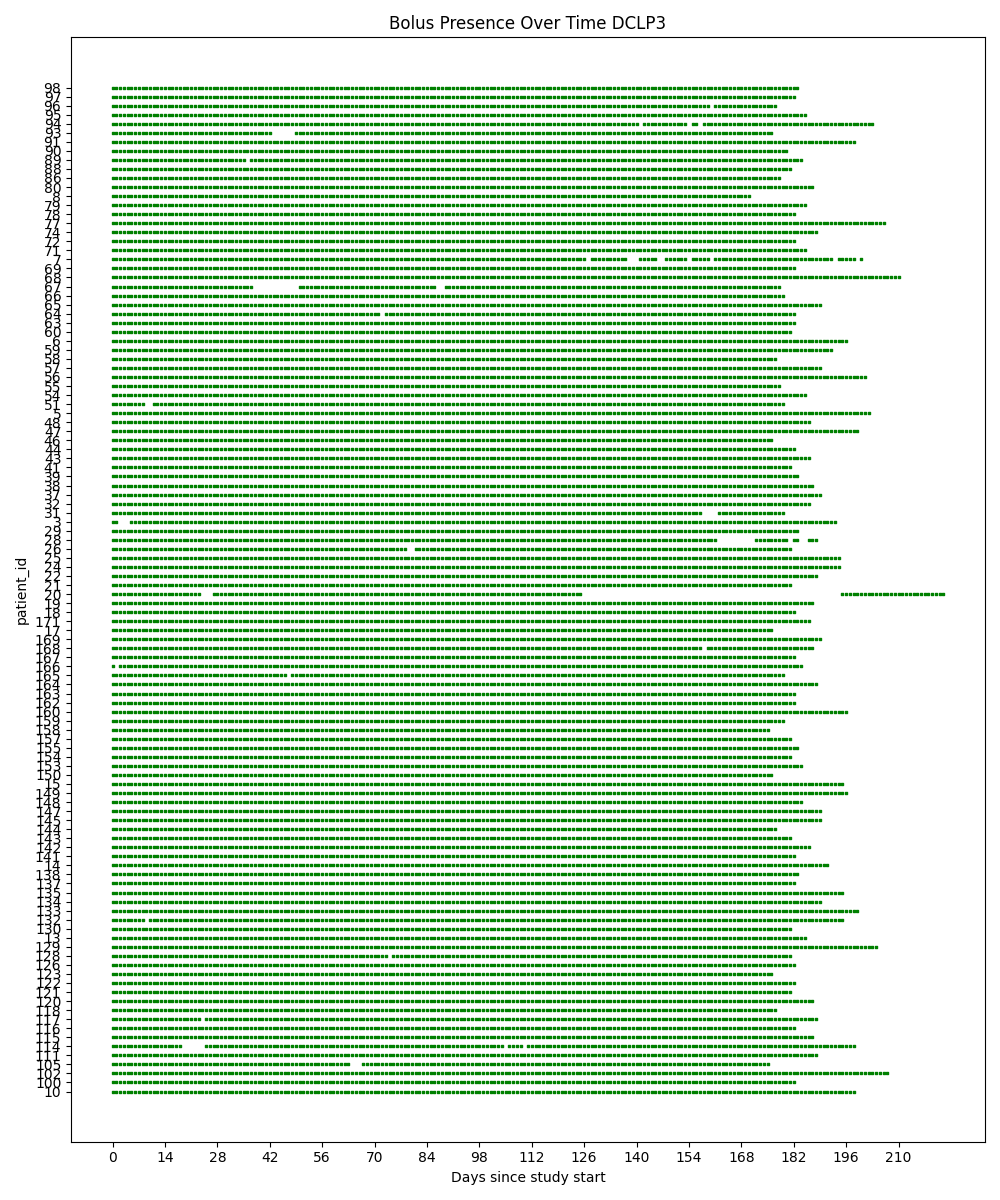

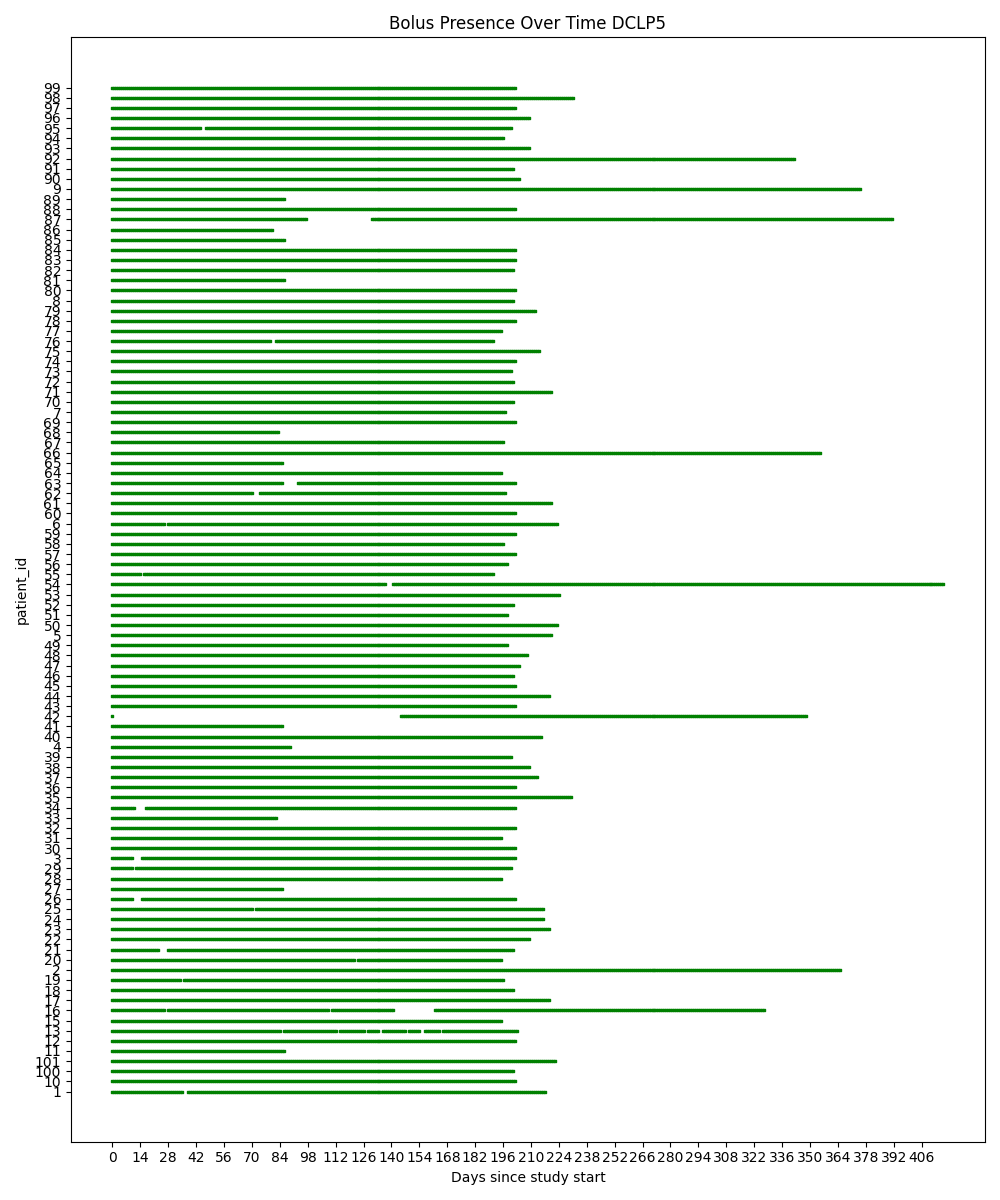

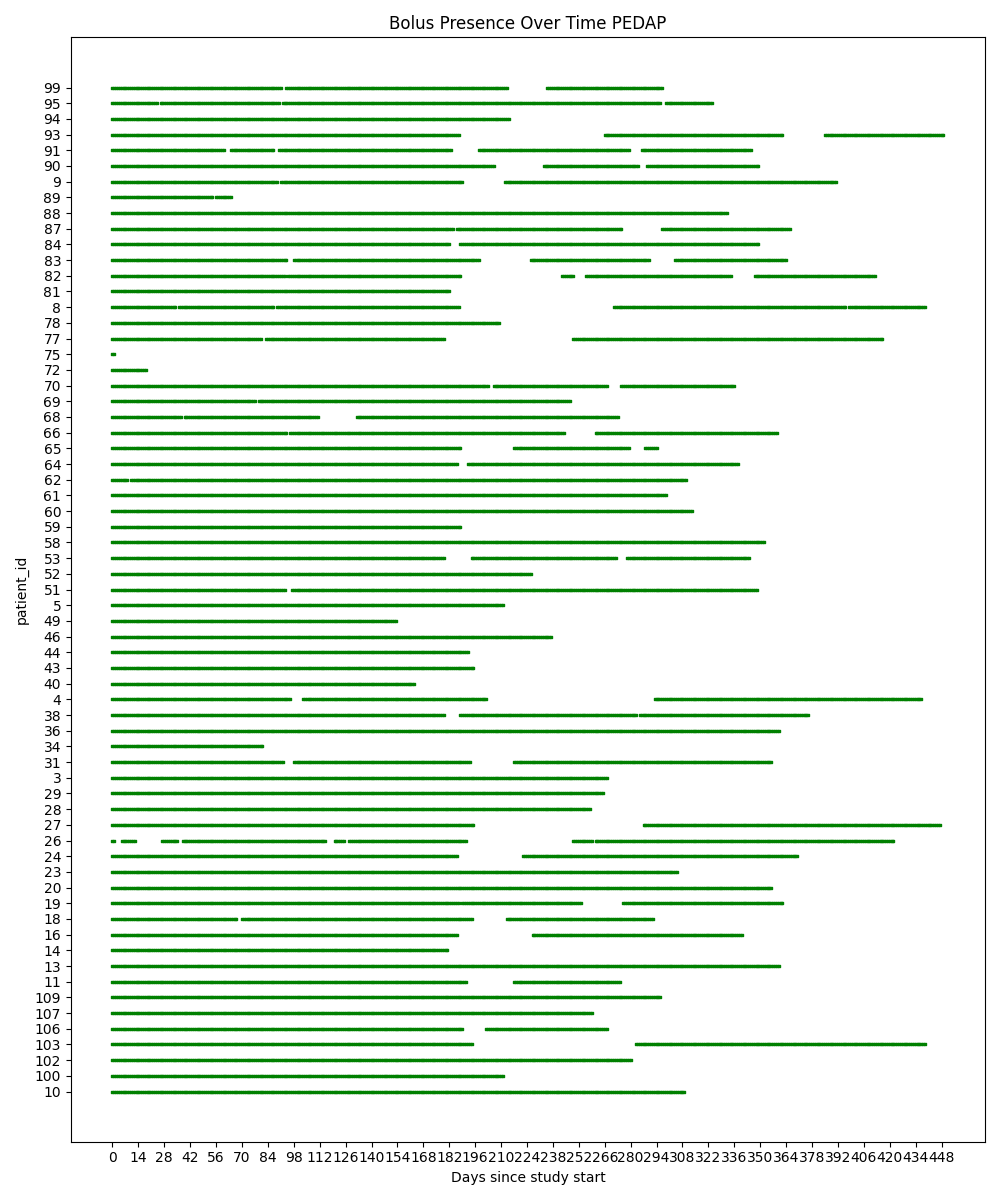

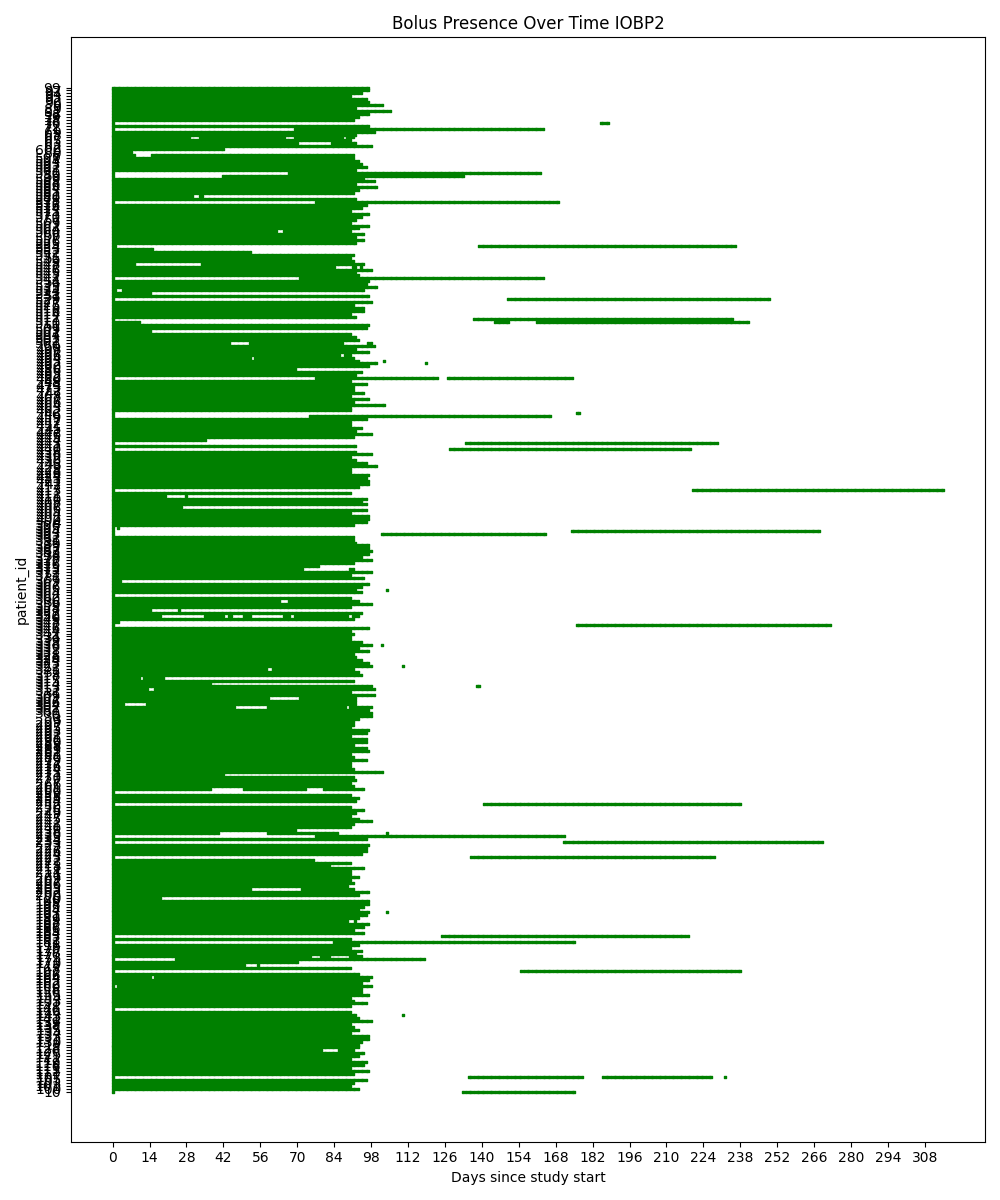

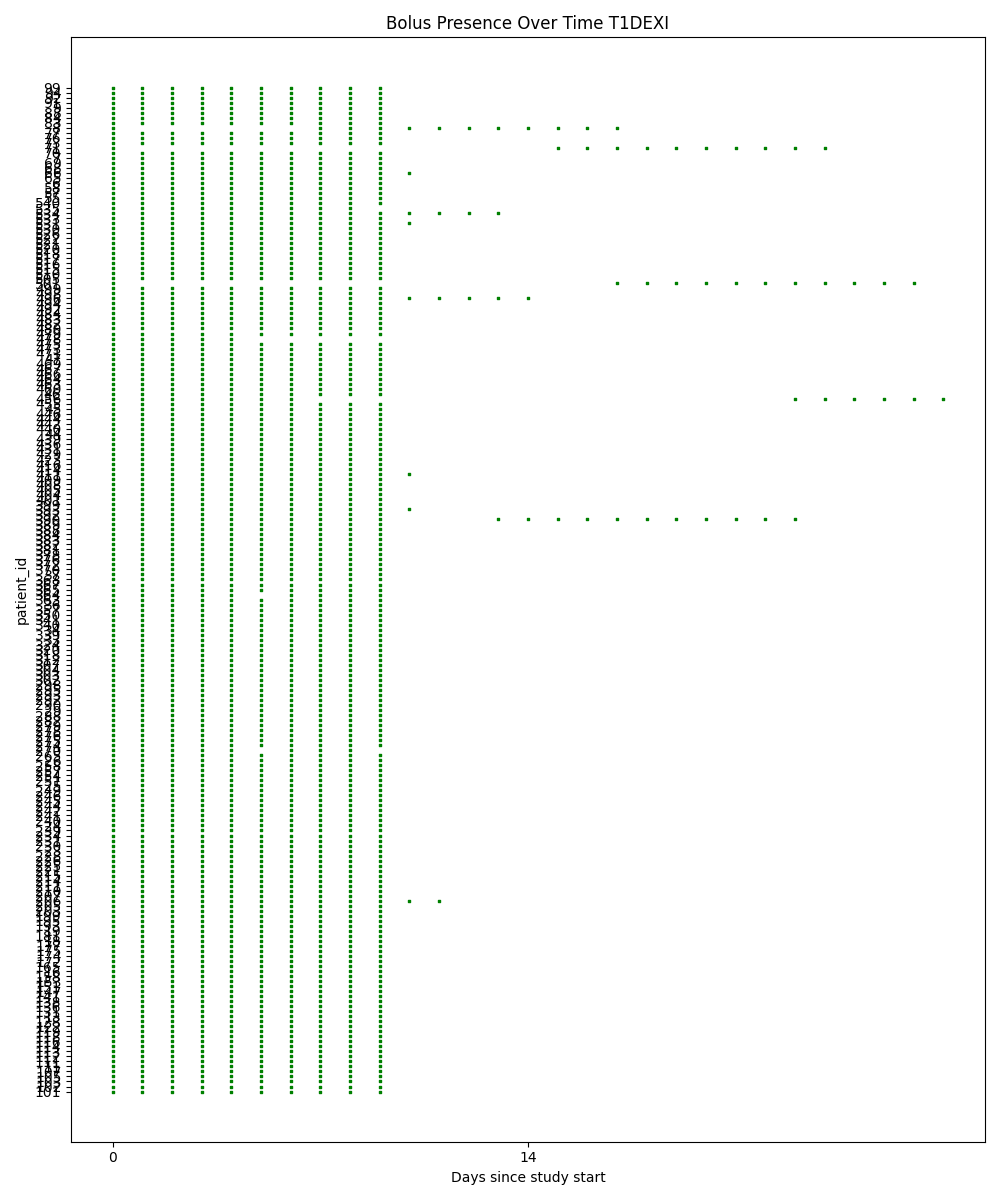

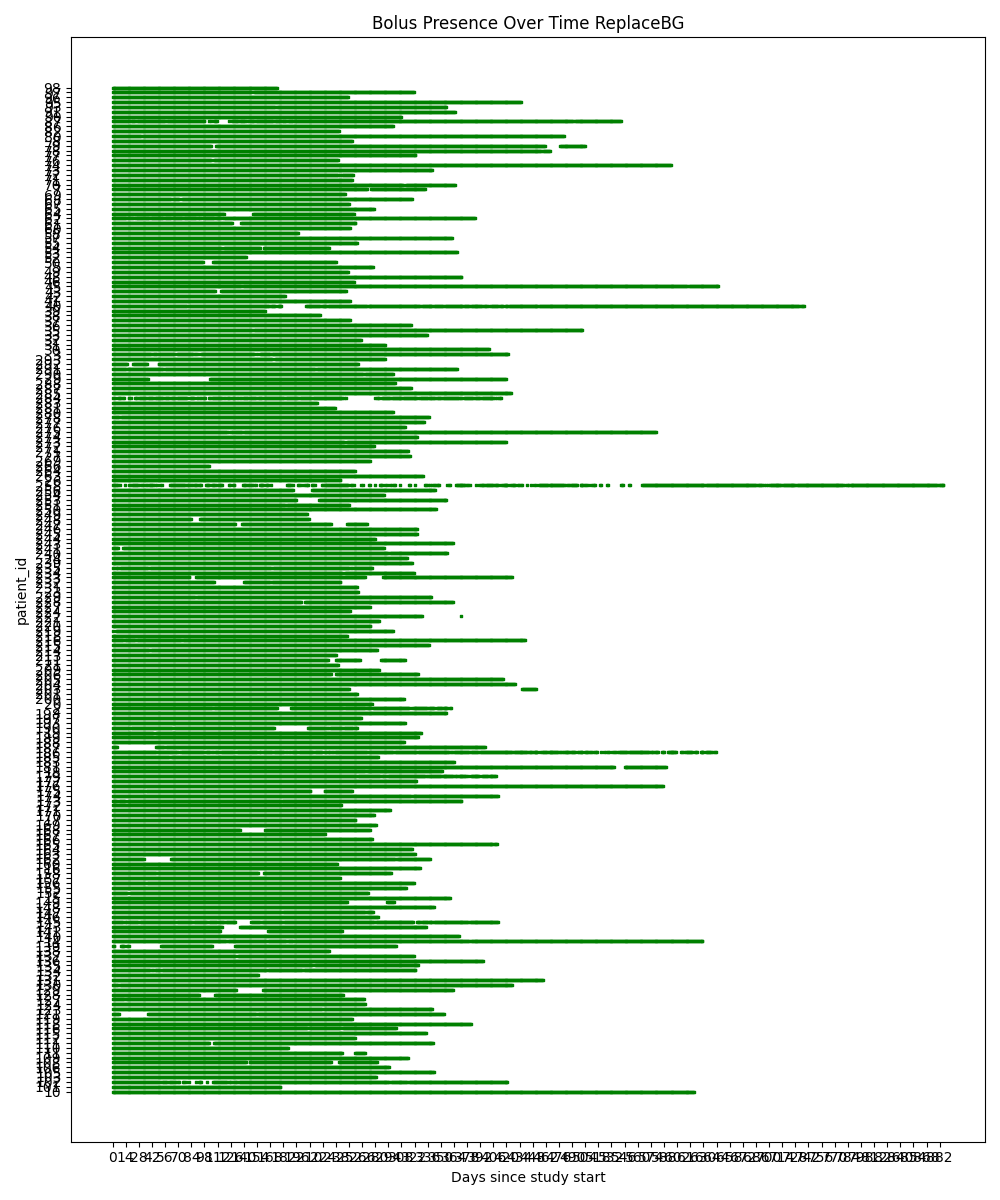

In [238]:
def draw_presence_matrix(df, datetime_col, value_col, ax=None):
    data = df.copy()
    data['day_since_start'] = data[datetime_col] - data.groupby(value_col)[datetime_col].transform("min")
    data['day_since_start'] = data['day_since_start'].dt.days

    # Create presence matrix using a simple pivot table
    presence_matrix = data.assign(present=1).pivot_table(
        index=value_col, 
        columns='day_since_start', 
        values='present', 
        aggfunc='max',  # Use 'max' to collapse multiple entries to 1
        fill_value=0
    )

    stacked = presence_matrix.stack().reset_index()
    stacked = stacked[stacked[0] == 1]

    # Plot with scatter
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 12))
    ax.scatter(stacked['day_since_start'], stacked[value_col], s=1, color="green", marker='s')

    # Configure plot
    xticks = np.arange(data['day_since_start'].min(), data['day_since_start'].max(), 14)
    ax.set_xticks(xticks)
    ax.set_xlabel("Days since study start")
    ax.set_ylabel(value_col)
    
# Example usage for all studies
for study_name, study in study_name_dict.items():
    data = study.bolus_event_history.copy()
    fig, ax = plt.subplots(figsize=(10, 12))
    ax.set_title(f"Bolus Presence Over Time {study_name}")
    draw_presence_matrix(data, 'datetime', 'patient_id', ax=ax)
    plt.tight_layout()
    plt.suptitle('')
    plt.show()
    save_figure(fig, f'presence_matrix_{study_name}')
    

In [227]:
data.day_sinde_start.max()

267

Findings
- There must be something wrong with T1DEXI because we know that the study has around 25 days worth of data for each patient but here, we see only 10

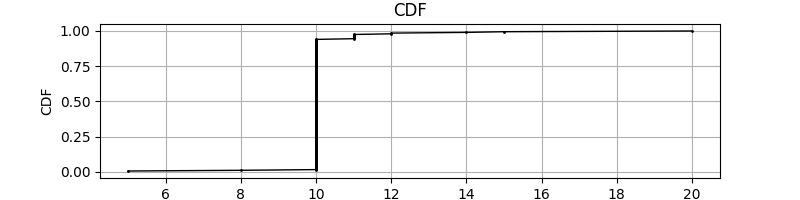

In [240]:
temp = study_name_dict['T1DEXI'].bolus_event_history.copy()
temp['day']= temp.datetime.dt.date
bolus_days = temp.groupby('patient_id').day.nunique()
cdf.plot_cdf(bolus_days)